# Análise Exploratória de Dados (EDA - Exploratory Data Analysis)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Ajustes de visualização
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [4]:
# Leitura dos dados
df = pd.read_csv('data/world_population.csv')

## 1. Visão Geral

In [6]:
print("Visão Geral do DataFrame:")
print(df.info(), "\n")
print("Estatísticas Descritivas:")
print(df.describe(), "\n")

Visão Geral do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64

## 2. Verificando valores ausentes

In [8]:
print("Valores Nulos por Coluna:")
print(df.isnull().sum(), "\n")

Valores Nulos por Coluna:
Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64 



### Opcional - detecção de Outliers nas Colunas de População

In [10]:
# Usando IQR para detectar outliers nas colunas populacionais
pop_columns = [col for col in df.columns if 'Population' in col and col != 'Growth Since 1970 (%)']
outlier_dict = {}

for col in pop_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_dict[col] = outliers.shape[0]

print("Contagem de Outliers nas Colunas Populacionais:")
for col, count in outlier_dict.items():
    print(f"{col}: {count} outliers")

Contagem de Outliers nas Colunas Populacionais:
2022 Population: 25 outliers
2020 Population: 26 outliers
2015 Population: 27 outliers
2010 Population: 30 outliers
2000 Population: 29 outliers
1990 Population: 30 outliers
1980 Population: 31 outliers
1970 Population: 28 outliers
World Population Percentage: 25 outliers


## 3. Diversidade por Coluna

In [12]:
print("Contagem de Valores Únicos por Coluna:")
print(df.nunique(), "\n")

Contagem de Valores Únicos por Coluna:
Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64 



## 4. Correlação entre variáveis numéricas

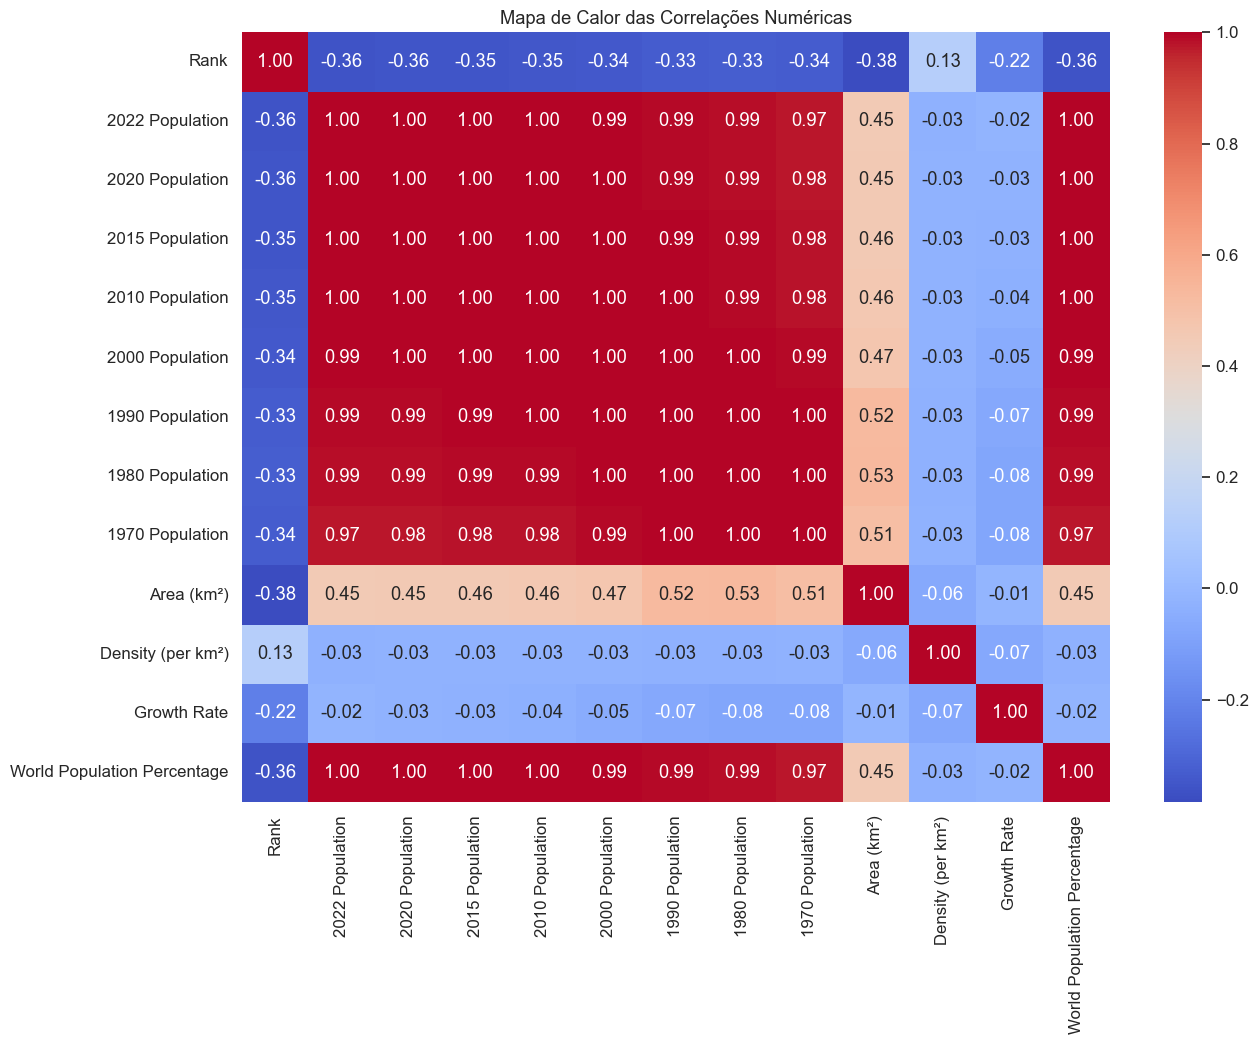

In [14]:
correlation = df.select_dtypes(include='number').corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor das Correlações Numéricas")
plt.show()

## 5. Boxplot para detectar outliers

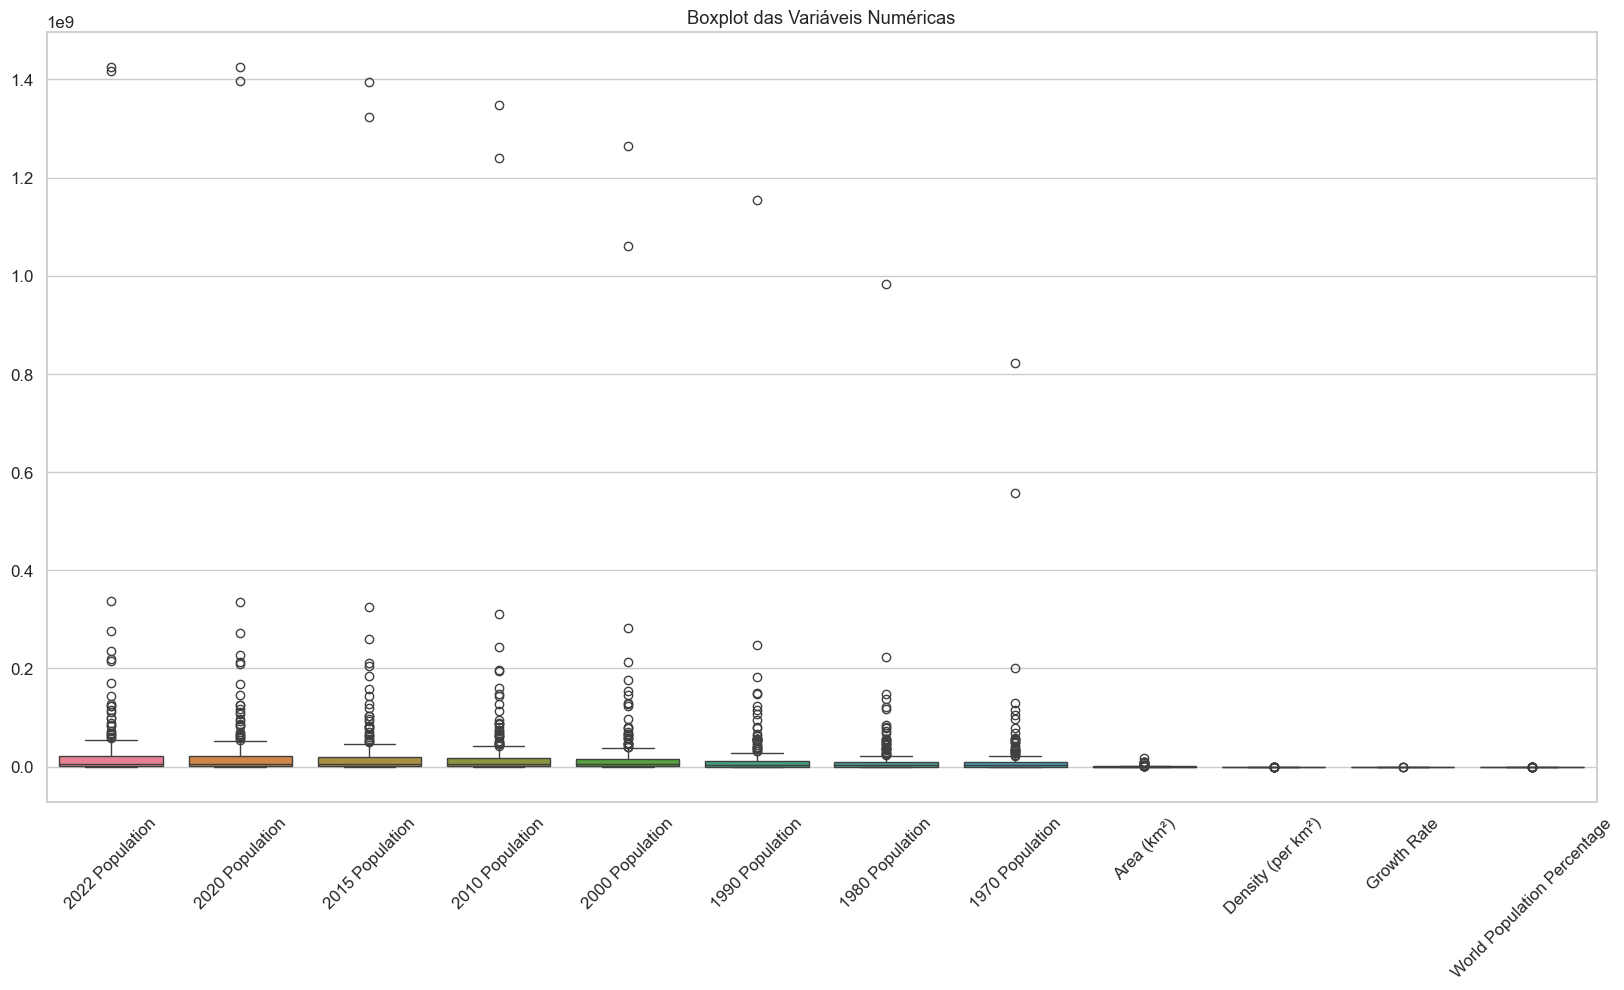

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.select_dtypes(include='float'))
plt.xticks(rotation=45)
plt.title("Boxplot das Variáveis Numéricas")
plt.show()

## 6. Top 10 países por população em 2022

In [18]:
top10_pop = df.sort_values(by='2022 Population', ascending=False).head(10)
print("Top 10 Países por População em 2022:")
print(top10_pop[['Country', '2022 Population']], "\n")

Top 10 Países por População em 2022:
           Country  2022 Population
41           China    1425887337.00
92           India    1417173173.00
221  United States     338289857.00
93       Indonesia     275501339.00
156       Pakistan     235824862.00
149        Nigeria     218541212.00
27          Brazil     215313498.00
16      Bangladesh     171186372.00
171         Russia     144713314.00
131         Mexico     127504125.00 



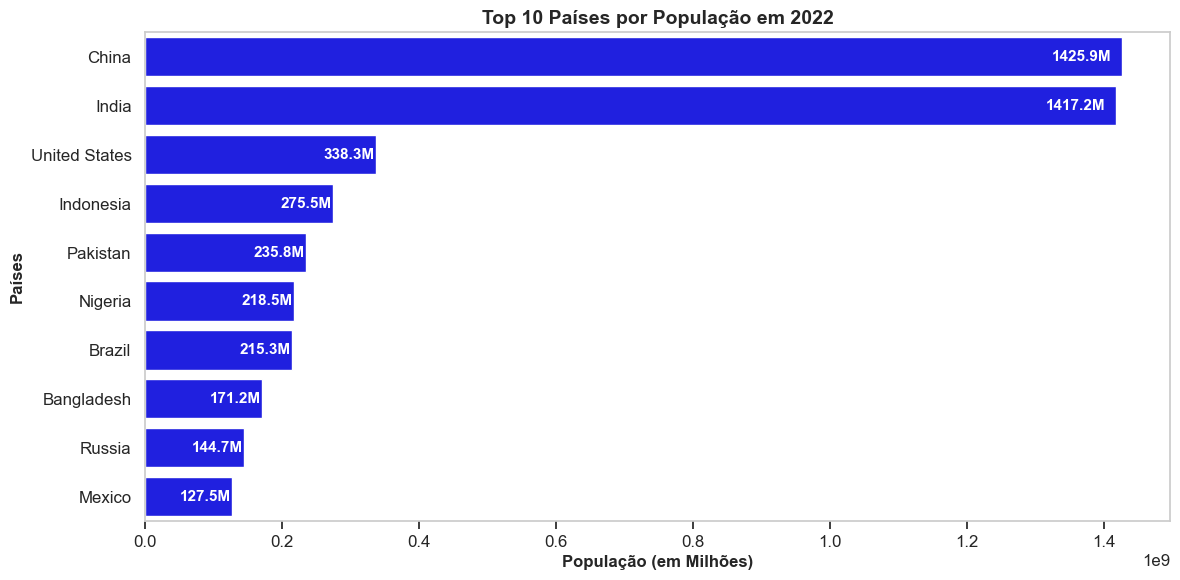

In [19]:
# Função para formatar valores em milhões
def format_millions(x):
    return f'{x/1e6:.1f}M'

# Gráfico com barra horizontal
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top10_pop, x='2022 Population', y='Country', color='blue')

# Adiciona rótulos nas barras
for i, value in enumerate(top10_pop['2022 Population']):
    ax.text(value - value * 0.01, i, format_millions(value), 
            va='center', ha='right', fontsize=11, fontweight='bold', color='white')

# Títulos e labels estéticos
ax.set_title("Top 10 Países por População em 2022", fontsize=14, fontweight='bold')
ax.set_xlabel("População (em Milhões)", fontsize=12, fontweight='bold')
ax.set_ylabel("Países", fontsize=12, fontweight='bold')

# Ajustes visuais
ax.tick_params(bottom=True)
ax.grid(False)
plt.tight_layout()
plt.show()

## 7. Densidade por país

In [21]:
top_density = df.sort_values(by='Density (per km²)', ascending=False).head(10)
print("Top 10 Países mais Densos:")
print(top_density[['Country', 'Density (per km²)', '2022 Population']], "\n")

Top 10 Países mais Densos:
          Country  Density (per km²)  2022 Population
119         Macau           23172.27        695168.00
134        Monaco           18234.50         36469.00
187     Singapore            8416.46       5975689.00
89      Hong Kong            6783.39       7488865.00
76      Gibraltar            5441.50         32649.00
15        Bahrain            1924.49       1472233.00
123      Maldives            1745.96        523787.00
125         Malta            1687.61        533286.00
188  Sint Maarten            1299.26         44175.00
22        Bermuda            1188.59         64184.00 



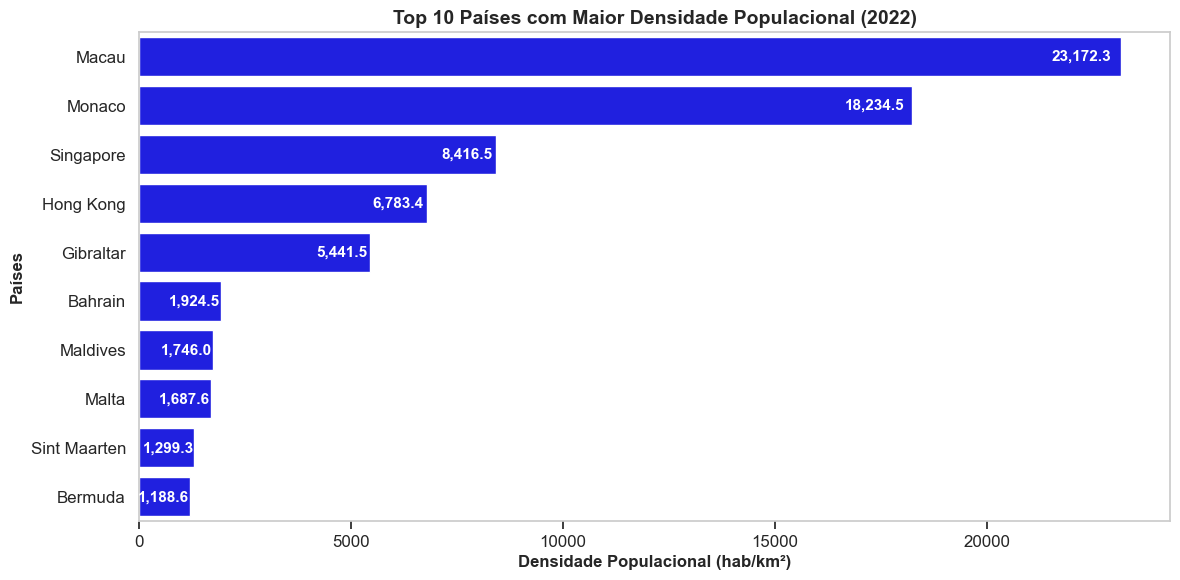

In [22]:
top10_density = df.sort_values(by='Density (per km²)', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top10_density, x='Density (per km²)', y='Country', color='blue')

# Rótulos nas barras
for i, value in enumerate(top10_density['Density (per km²)']):
    ax.text(value - value * 0.01, i, f'{value:,.1f}', 
            va='center', ha='right', fontsize=11, fontweight='bold', color='white')

# Estilo e rótulos
ax.set_title("Top 10 Países com Maior Densidade Populacional (2022)", fontsize=14, fontweight='bold')
ax.set_xlabel("Densidade Populacional (hab/km²)", fontsize=12, fontweight='bold')
ax.set_ylabel("Países", fontsize=12, fontweight='bold')
ax.tick_params(bottom=True)
ax.grid(False)

plt.tight_layout()
plt.show()

## 8. Crescimento Populacional (2022 vs 1970)

In [24]:
df['Growth Since 1970 (%)'] = ((df['2022 Population'] - df['1970 Population']) / df['1970 Population']) * 100
top_growth = df.sort_values(by='Growth Since 1970 (%)', ascending=False).head(10)
print("Países com Maior Crescimento desde 1970:")
print(top_growth[['Country', 'Growth Since 1970 (%)']], "\n")

Países com Maior Crescimento desde 1970:
                      Country  Growth Since 1970 (%)
219      United Arab Emirates                3067.27
167                     Qatar                2183.87
130                   Mayotte                 821.63
215  Turks and Caicos Islands                 706.76
52                   Djibouti                 676.32
230            Western Sahara                 654.19
104                    Jordan                 624.67
188              Sint Maarten                 605.67
155                      Oman                 582.32
15                    Bahrain                 561.51 



### Opcional - Países com Crescimento **Negativo** desde 1970

In [26]:
decrescentes = df[df['Growth Since 1970 (%)'] < 0][['Country', 'Growth Since 1970 (%)']].sort_values(by='Growth Since 1970 (%)')
print("Países com Crescimento Populacional Negativo desde 1970:")
print(decrescentes)

Países com Crescimento Populacional Negativo desde 1970:
                    Country  Growth Since 1970 (%)
150                    Niue                 -62.70
137              Montserrat                 -61.50
226            Vatican City                 -32.18
111                  Latvia                 -22.81
30                 Bulgaria                 -20.98
44             Cook Islands                 -16.90
218                 Ukraine                 -16.03
25   Bosnia and Herzegovina                 -15.25
117               Lithuania                 -14.33
133                 Moldova                 -11.81
46                  Croatia                 -10.29
90                  Hungary                  -3.37
61                  Estonia                  -2.64
170                 Romania                  -1.32


## 9. Médias por Continente

In [28]:
df_numericas = df.select_dtypes(include='number')
mean_by_continent = df.groupby('Continent')[df_numericas.columns].mean().sort_values(by='2022 Population', ascending=False)
print("Média de Indicadores por Continente:")
print(mean_by_continent, "\n")

Média de Indicadores por Continente:
                Rank  2022 Population  2020 Population  2015 Population  \
Continent                                                                 
Asia           77.56      96327387.31      94955134.37      89165003.64   
South America  97.57      31201186.29      30823574.50      29509599.71   
Africa         92.16      25455879.68      23871435.26      21419703.57   
Europe        124.50      15055371.82      14915843.92      15027454.12   
North America 160.93      15007403.40      14855914.82      14259596.25   
Oceania       188.52       2046386.32       1910148.96       1756664.48   

               2010 Population  2000 Population  1990 Population  \
Continent                                                          
Asia               89087770.00      80580835.11      48639995.33   
South America      26789395.54      25015888.69      21224743.93   
Africa             18898197.31      14598365.95      11376964.52   
Europe             147

## 10. Evolução populacional média por continente (1970–2022)

In [30]:
pop_cols = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
            '2010 Population', '2015 Population', '2020 Population', '2022 Population']

df2 = df.groupby('Continent')[pop_cols].mean().sort_values(by="2022 Population", ascending=False)
df3 = df2.transpose()

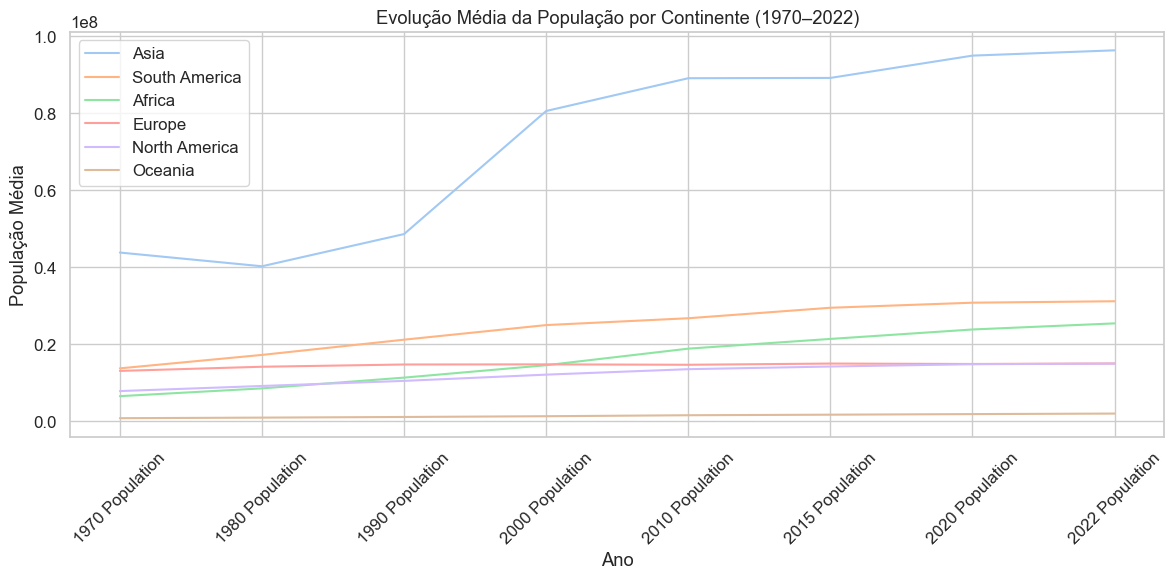

In [31]:
# Plot
plt.figure(figsize=(12, 6))
for continent in df3.columns:
    plt.plot(df3.index, df3[continent], label=continent)

plt.title("Evolução Média da População por Continente (1970–2022)")
plt.xlabel("Ano")
plt.ylabel("População Média")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Opcional - Gráficos Separados por Continente (População média ao longo dos anos)

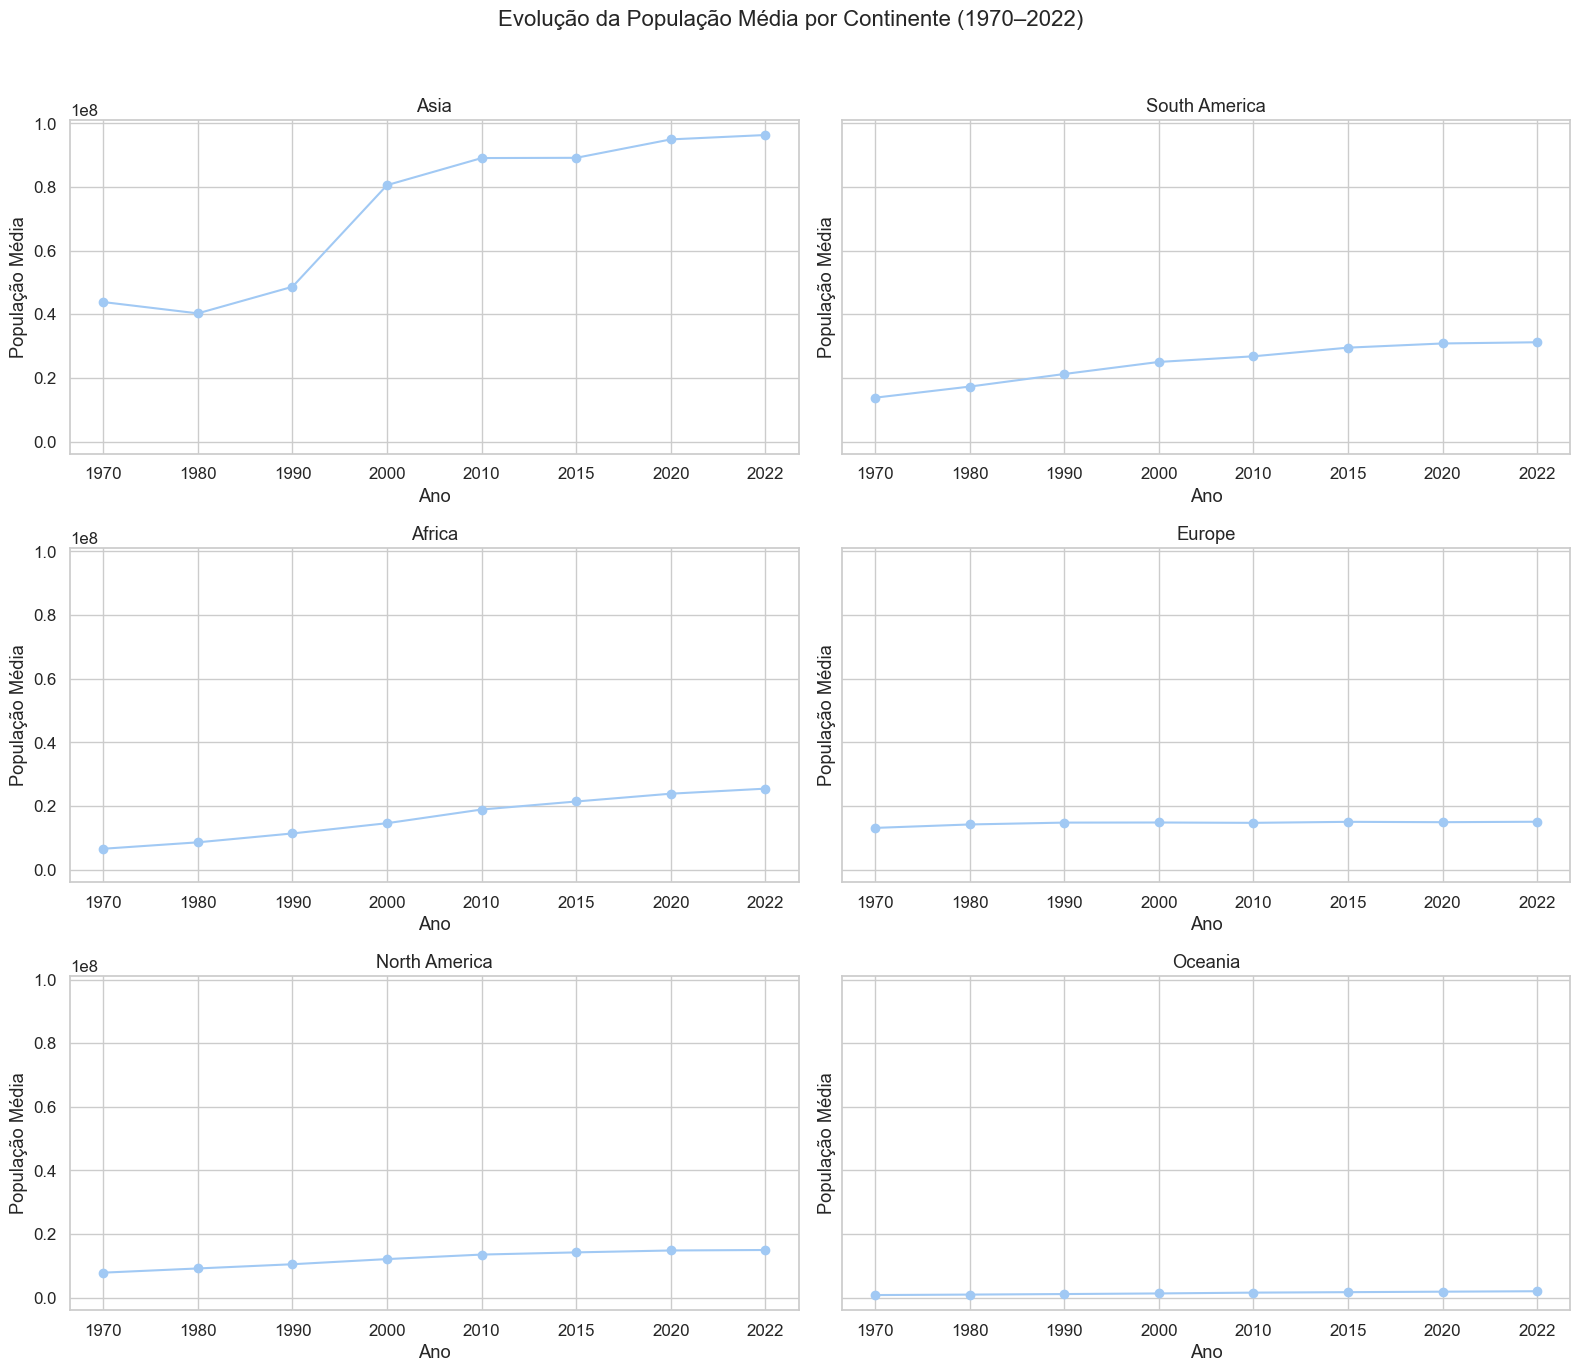

In [33]:
# Renomear o índice de df3 para conter apenas os anos
df3.index = df3.index.str.extract(r'(\d{4})')[0]

# Gráficos de linha por continente
fig, axes = plt.subplots(3, 2, figsize=(16, 14), sharey=True)
axes = axes.flatten()

for idx, continent in enumerate(df3.columns):
    axes[idx].plot(df3.index, df3[continent], marker='o', label=continent)
    axes[idx].set_title(continent)
    axes[idx].set_xlabel('Ano')
    axes[idx].set_ylabel('População Média')
    axes[idx].grid(True)

plt.suptitle("Evolução da População Média por Continente (1970–2022)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Opcional - Correlação entre Densidade e Crescimento Populacional

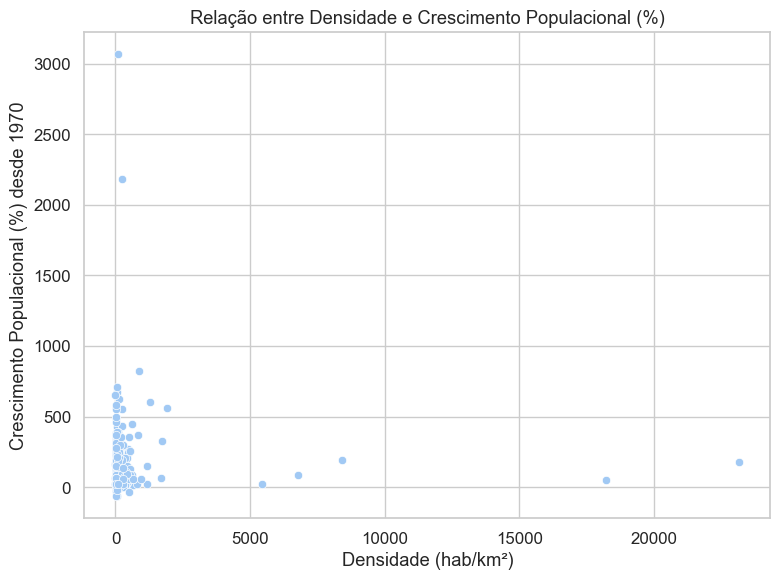

In [35]:
# Correlação entre Densidade e Crescimento
corr_density_growth = df[['Density (per km²)', 'Growth Since 1970 (%)']].corr().iloc[0, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Density (per km²)', y='Growth Since 1970 (%)')
plt.title("Relação entre Densidade e Crescimento Populacional (%)")
plt.xlabel("Densidade (hab/km²)")
plt.ylabel("Crescimento Populacional (%) desde 1970")
plt.grid(True)
plt.tight_layout()
plt.show()